<a href="https://colab.research.google.com/github/Pawan20031/Women-Safety-System/blob/main/Clustering_(Spatial_Clustering_using_KMeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset (replace 'data.csv' with your file path)
data = pd.read_csv('data.csv')

In [ ]:
# Select features (latitude and longitude)
X = data[['Latitude', 'Longitude']]

In [ ]:
# Initialize and train a KMeans clustering model
num_clusters = 3  # Adjust the number of clusters as needed
model = KMeans(n_clusters=num_clusters, random_state=42)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Get cluster labels and centroids
cluster_labels = model.labels_
centroids = model.cluster_centers_

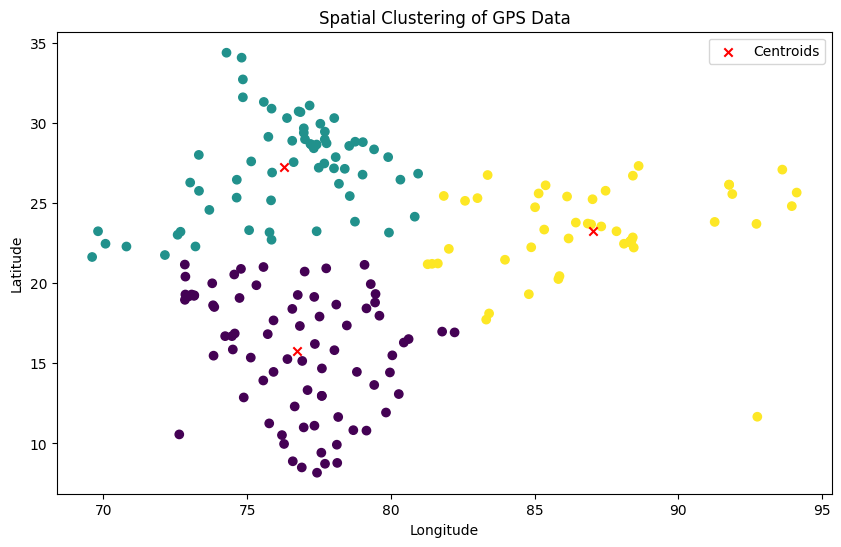

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of GPS Data')
plt.legend()
plt.show()